In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Orders - Analysis Task.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [4]:
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
variant_id,70052.0,2.442320e+11,4.255079e+12,1.001447e+07,2.692223e+07,4.494514e+07,7.743106e+07,8.422212e+13
customer_id,70052.0,6.013091e+11,6.223201e+12,1.000661e+06,3.295695e+06,5.566107e+06,7.815352e+06,9.977409e+13
order_id,70052.0,5.506075e+13,2.587640e+13,1.000657e+13,3.270317e+13,5.522207e+13,7.736876e+13,9.999554e+13
net_quantity,70052.0,7.011791e-01,7.394969e-01,-3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
gross_sales,70052.0,6.177630e+01,3.180069e+01,0.000000e+00,5.167000e+01,7.417000e+01,7.917000e+01,4.450000e+02
discounts,70052.0,-4.949904e+00,7.769972e+00,-2.000000e+02,-8.340000e+00,0.000000e+00,0.000000e+00,0.000000e+00
returns,70052.0,-1.024605e+01,2.515468e+01,-2.375000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
net_sales,70052.0,4.658035e+01,5.180269e+01,-2.375000e+02,4.708000e+01,6.333000e+01,7.417000e+01,4.450000e+02
taxes,70052.0,9.123636e+00,1.030524e+01,-4.750000e+01,8.375000e+00,1.266000e+01,1.484000e+01,6.334000e+01
total_sales,70052.0,5.570398e+01,6.192056e+01,-2.850000e+02,5.622750e+01,7.600000e+01,8.900000e+01,4.450000e+02


In [6]:
df['day'] = pd.to_datetime(df['day'])

df['day_of_week'] = df['day'].dt.day_name()

In [7]:
df['day_of_week'].unique()

array(['Thursday', 'Friday', 'Tuesday', 'Wednesday', 'Saturday', 'Monday',
       'Sunday'], dtype=object)

<AxesSubplot:xlabel='day_of_week', ylabel='total_sales'>

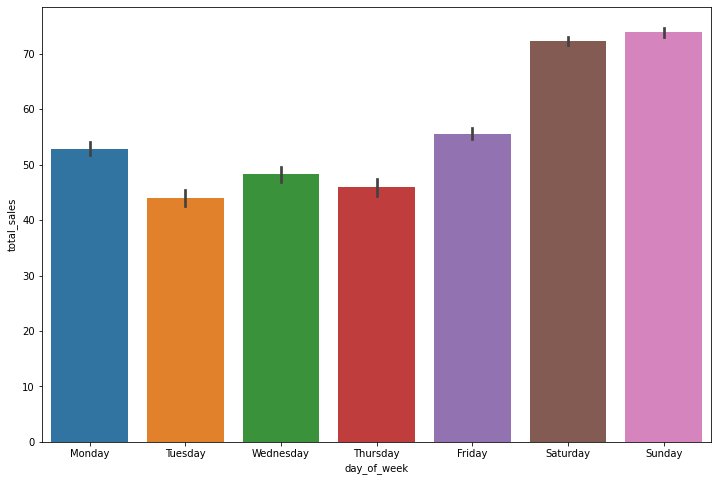

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='day_of_week',y='total_sales',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
       'Sunday'])

In [9]:
df_grouped = df.groupby('customer_id').sum()

In [11]:
df_grouped['return rate'] = df_grouped['returned_item_quantity'] / df_grouped['ordered_item_quantity']

In [15]:
X = df_grouped[['net_quantity','total_sales','return rate']]

In [24]:
X = X.replace([np.inf, -np.inf],0)

In [25]:
X.value_counts('return rate')

return rate
 0.000000    19730
-1.000000     1805
-0.500000     1241
-0.333333      722
-0.250000      386
             ...  
-0.190476        1
-0.187500        1
-0.702703        1
-0.411765        1
-8.000000        1
Length: 111, dtype: int64

In [28]:
X.columns

Index(['net_quantity', 'total_sales', 'return rate'], dtype='object')

### Scale the features

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [26]:
scaled_X = scaler.fit_transform(X)

### Import model and test

In [31]:
from sklearn.cluster import KMeans

In [39]:
ssd = []

for k in range(2,15):
    
    model = KMeans(n_clusters=k)
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

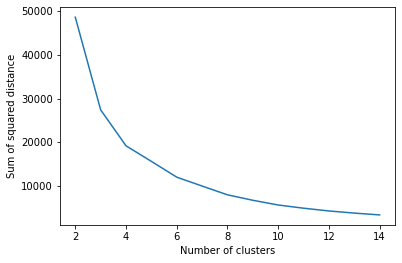

In [40]:
plt.plot(range(2,15),ssd)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance');

### Update model to have number of clusters = 4

In [41]:
model = KMeans(n_clusters=4,random_state=101)

In [42]:
model.fit(scaled_X)

KMeans(n_clusters=4, random_state=101)

In [43]:
X['Label'] = model.predict(scaled_X)

In [44]:
X.head()

,net_quantity,total_sales,return rate,Label
customer_id,,,,
1000661,1,86.67,-0.666667,1
1001914,1,79.20,0.000000,0
1002167,2,167.45,-0.333333,0
1002387,1,89.00,0.000000,0
1002419,1,53.10,-0.500000,1


<AxesSubplot:xlabel='net_quantity', ylabel='total_sales'>

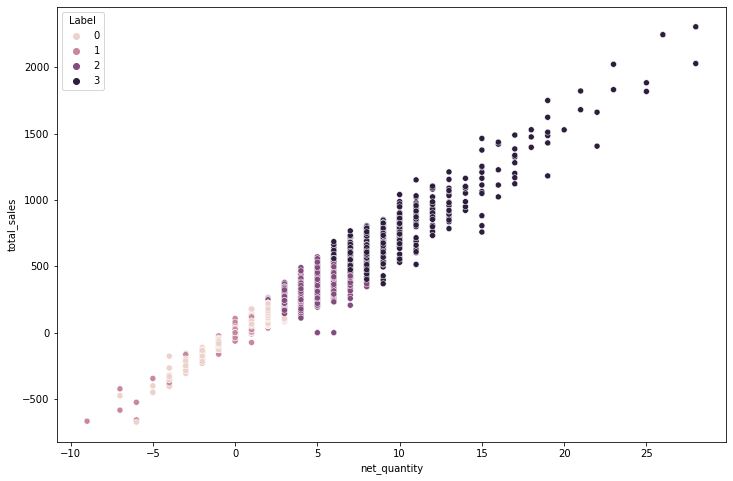

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=X,x='net_quantity',y='total_sales',hue='Label')

In [48]:
import plotly.express as px
import plotly.graph_objects as go

In [54]:
X.value_counts('Label')

Label
0    15880
2     5250
1     3619
3      794
dtype: int64

In [58]:
fig = px.scatter_3d(X,
                    x="net_quantity",
                    y="return rate",
                    z="total_sales",
                    color='Label',
                    opacity=0.5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

<AxesSubplot:xlabel='Label', ylabel='count'>

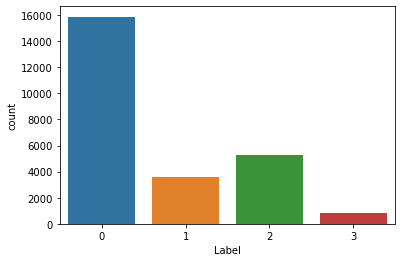

In [52]:
sns.countplot(data=X,x='Label')

### We are able to cluster into 4 main groups. 

Label 1: Customers with high return rate and low total sales. Reduce business with these

Label 2: Second largest majority. These customers do not return much. Good to keep them

Label 3: Spenders. Customers who purchase in high quantity and also high total sales. Want to target them

Label 0: Majority of where our customers are as seen by countplot. Do not purchase much and do not return much. Want to move these to label 2 ideally.


In [59]:
df_grouped['Label'] = X['Label']

In [60]:
df_grouped

,variant_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity,return rate,Label
customer_id,,,,,,,,,,,,,
1000661,288777918,495599945586060,1,237.53,-20.86,-144.45,72.22,14.45,86.67,-2,3,-0.666667,1
1001914,24064862,79758569034715,1,82.50,-16.50,0.00,66.00,13.20,79.20,0,1,0.000000,0
1002167,201058418,177524125324054,2,211.67,-16.50,-55.63,139.54,27.91,167.45,-1,3,-0.333333,0
1002387,42013050,84274330344728,1,74.17,0.00,0.00,74.17,14.83,89.00,0,1,0.000000,0
1002419,108155373,273370132654464,1,106.67,-20.84,-41.58,44.25,8.85,53.10,-1,2,-0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98854671633650,56269596,115033414346699,3,210.01,-7.92,0.00,202.09,40.41,242.50,0,3,0.000000,2
98974226154136,44830178,45066842874543,1,74.17,0.00,0.00,74.17,14.83,89.00,0,1,0.000000,0
99262726332691,127091962,375945006481040,2,222.50,0.00,-74.17,148.33,29.67,178.00,-1,3,-0.333333,0


In [61]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5859-50B8

 Directory of C:\Users\PC\ML Portfolio\Project 2

08/03/2022  08:59 pm    <DIR>          .
08/03/2022  08:59 pm    <DIR>          ..
20/04/2020  05:03 pm             1,741 .gitignore
08/03/2022  02:48 pm    <DIR>          .ipynb_checkpoints
08/03/2022  03:12 pm        13,040,402 Customer_Segmentation_Kmeans_Clustering.ipynb
08/03/2022  08:59 pm         1,992,366 Nicholas Project 2 - Customer segmentation.ipynb
20/04/2020  05:03 pm         9,322,372 Orders - Analysis Task.csv
20/04/2020  05:03 pm               965 README.md
               5 File(s)     24,357,846 bytes
               3 Dir(s)  137,484,775,424 bytes free
